# Lorenzo Pastore - Big Data in GIS (Task 1)
Matricola: 847212

- plot a map showing the density of population in the towns of the province of Milano, in 2011

In [1]:
#Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

# Practicing with cartopy and geopandas

1. calculate the trends in population change (%) between 2014 and 2011
2. plot the provinces in different colors
3. show with colorscale the distance between towns in Lombardia and Milano
4. play with datasets in http://www.geoportale.regione.lombardia.it

In [2]:
# set the filepath and load
shapefile = "./REGIONE_LOMBARDIA/Comuni_2012.shp"

#reading the file stored in variable fp
comuni = gpd.read_file(shapefile)

In [3]:
# Merge this geodataframe with external data, for instance a table

tab_pop = pd.read_csv('./REGIONE_LOMBARDIA/Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')

# Then, let's join it with the geodatabase "comuni"
#   In order to make a join, we need a common field: let that be the town code. 
#   Let's rename it in the table so that the attribute names match

tab_pop.rename(columns={'Codice':'COD_ISTAT'}, inplace=True)
tab_pop.COD_ISTAT=tab_pop.COD_ISTAT.astype(int)
comuni.COD_ISTAT=comuni.COD_ISTAT.astype(int)
comuni = comuni.merge(tab_pop, on='COD_ISTAT')

## calculate the trends in population change (%) between 2014 and 2011

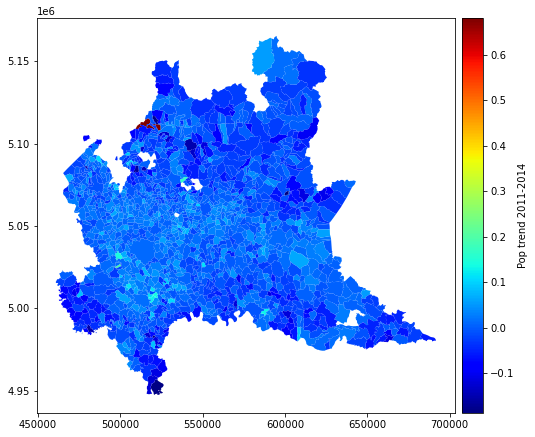

In [4]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

comuni.plot(column=(comuni['Pop2014']- comuni['Pop2011'])/comuni['Pop2014'],
            ax = ax,
            cax=cax,
            cmap='jet',
            legend=True,
            legend_kwds={'label': 'Pop trend 2011-2014'})

## plot the provinces in different colors

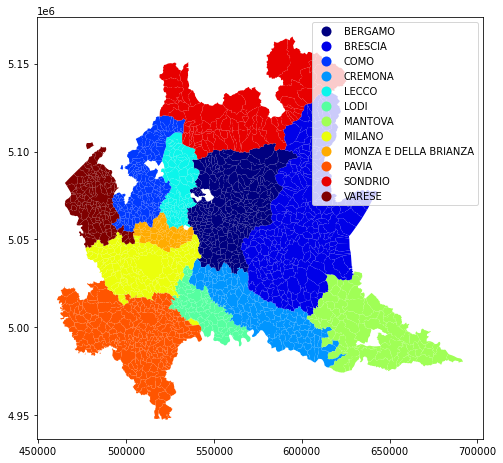

In [5]:
comuni.plot(column=comuni['NOME_PRO'],
            cmap='jet',
            figsize= (8,8),
            legend=True)

## show with colorscale the distance between towns in Lombardia and Milano

In [6]:
from shapely.geometry import Polygon
dist = gpd.GeoSeries(comuni['geometry'])
dist.crs =3857
comuni[comuni.NOME_COM=='MILANO']

,CLASSREF,BELFIORE,COD_ISTAT,NOME_COM,COD_PRO,NOME_PRO,COD_CMO,NOME_CMO,COD_ASL,NOME_ASL,COD_REG,NOME_REG,SHAPE_AREA,SHAPE_LEN,geometry,Comune,Cod_prov,Provincia,Pop2011,Pop2014
1119,ead1f83c-5530-4e67-8d9f-1779685fd940,F205,3015146,MILANO,15,MILANO,None,None,8,MILANO,03,LOMBARDIA,1.817836e+08,106417.093165,"POLYGON ((505072.217 5039016.767, 505158.842 5...",MILANO,15,MILANO,1324110.0,1337155.0


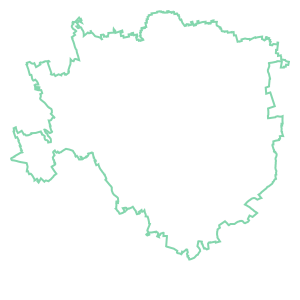

In [7]:
comuni.exterior[1119]

In [8]:
#Calculate distances from Milan
comuni['distanza'] = comuni.exterior.distance(comuni.exterior[1119])

In [9]:
comuni['distanza'] = comuni['distanza']/1000

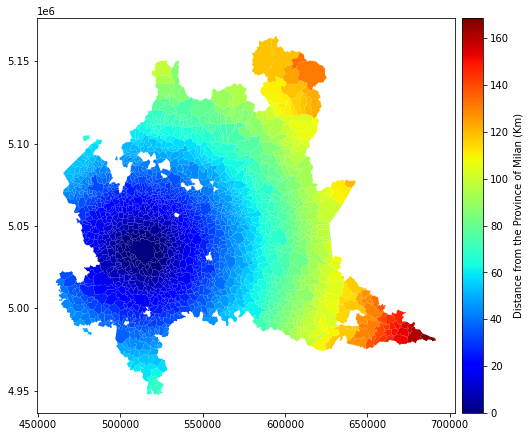

In [10]:
#Plot
fig, ax = plt.subplots(1,1,figsize=(8,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

comuni.plot(comuni['distanza'],
            ax = ax,
            cax=cax,
            cmap='jet',
            legend=True,
            legend_kwds={'label': 'Distance from the Province of Milan (Km)'})

## play with datasets in http://www.geoportale.regione.lombardia.it

In [14]:
shapefile_2 = "./REGIONE_LOMBARDIA 2/Opere_incompiute.shp"

#reading the file stored in variable fp
opere = gpd.read_file(shapefile_2)
opere = opere.to_crs(comuni.crs)

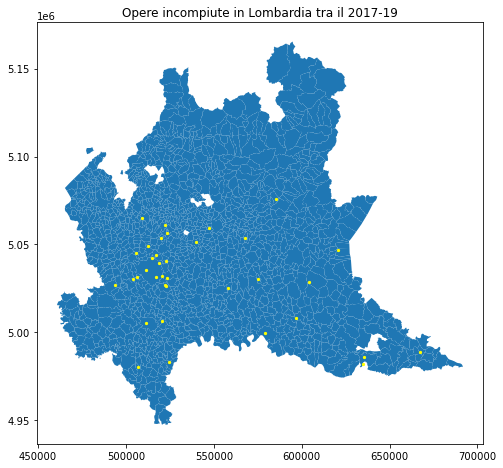

In [15]:
base = comuni.plot(figsize =(8,8))
base.set_title('Opere incompiute in Lombardia tra il 2017-19')
opere.plot(ax=base, marker='o', color='yellow', markersize=5);

# Task 1
- plot a map showing the density of population in the towns of the province of Milano, in 2011

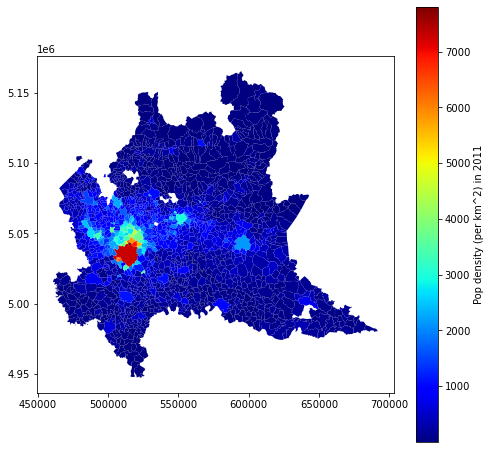

In [16]:
comuni.plot(column=(comuni['Pop2011']/(comuni['geometry'].area/1e6)), 
            cmap='jet',
            figsize= (8,8),
            legend=True,
            legend_kwds={'label': 'Pop density (per km^2) in 2011'})

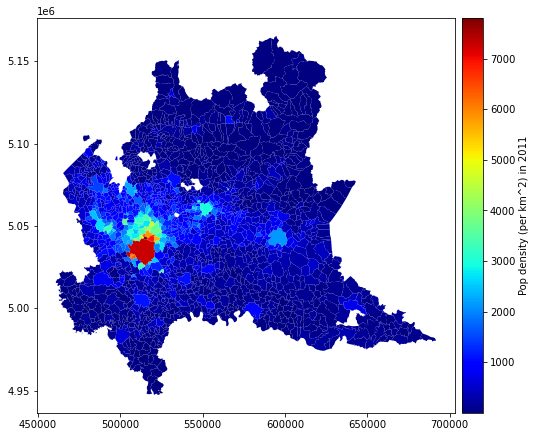

In [17]:
# Adjusting the legend axis
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,1,figsize=(8,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

comuni.plot(column=(comuni['Pop2011']/(comuni['geometry'].area/1e6)), 
            ax = ax,
            cax=cax,
            cmap='jet',
            legend=True,
            legend_kwds={'label': 'Pop density (per km^2) in 2011'})